### Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import pickle
import os
import matplotlib.pyplot as plt
import fonctions

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

/Users/lucilerabeau/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [3]:
print('Liste des fichiers csv disponibles:')
display(os.listdir('./data/'))

Liste des fichiers csv disponibles:


['application_test.csv',
 '.DS_Store',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [4]:
#'.DS_Store' ?

In [5]:
# Charger les jeux de données
df_train = pd.read_csv('data/application_train.csv')
df_test = pd.read_csv('data/application_test.csv')
df_bureau = pd.read_csv('data/bureau.csv')
df_bureau_balance = pd.read_csv('data/bureau_balance.csv')
df_credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
df_installments_payments = pd.read_csv('data/installments_payments.csv')
df_pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
df_previous_application = pd.read_csv('data/previous_application.csv')

In [6]:
# Documentation
columns_description = pd.read_csv('data/HomeCredit_columns_description.csv', encoding = 'ISO-8859-1')
columns_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [7]:
# Data description
fonctions.csv_describe(folder = glob.glob('./data/*.csv'))

,Rows,Columns,%NaN,%Duplicate,object_dtype,float_dtype,int_dtype,bool_dtype,MB_Memory
./data/application_test.csv,48744,121,23.81,0.0,16,65,40,0,44.998
./data/HomeCredit_columns_description.csv,219,5,12.15,0.0,4,0,1,0,0.008
./data/POS_CASH_balance.csv,10001358,8,0.07,0.0,1,2,5,0,610.435
./data/credit_card_balance.csv,3840312,23,6.65,0.0,1,15,7,0,673.883
./data/installments_payments.csv,13605401,8,0.01,0.0,0,5,3,0,830.408
./data/application_train.csv,307511,122,24.40,0.0,16,65,41,0,286.227
./data/bureau.csv,1716428,17,13.50,0.0,3,8,6,0,222.620
./data/previous_application.csv,1670214,37,17.98,0.0,16,15,6,0,471.481
./data/bureau_balance.csv,27299925,3,0.00,0.0,1,0,2,0,624.846
./data/sample_submission.csv,48744,2,0.00,0.0,0,1,1,0,0.744


### application_train.csv

In [8]:
print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [9]:
# df_test -> pas de target
# à laisser de côté pour le moments

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 9152465

Pourcentage de valeurs manquantes : 24.4


Valeurs manquantes par colonne : 



,Nombres de valeurs manquantes,% de valeurs manquantes
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35



Heatmap des valeurs manquantes : 



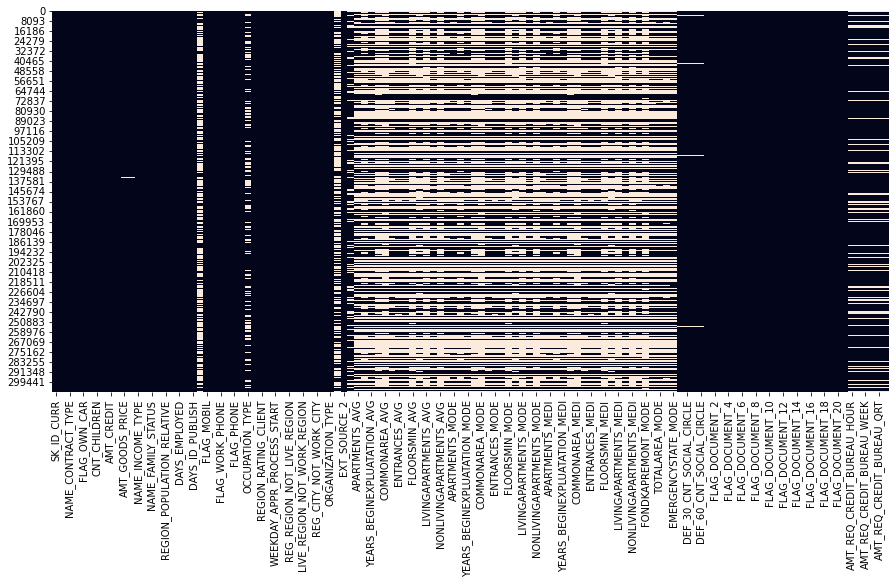

In [11]:
# Pas de duplicats mais 24% de données manquantes
# regarder le détail par colonne

fonctions.nan_detection(df_train)

In [12]:
# Distribution de la colonne "target"
df_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

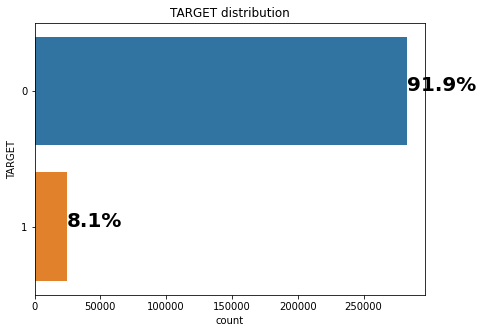

In [13]:
ax, fig = plt.subplots(figsize = (7, 5))
ax = sns.countplot(y = 'TARGET', data = df_train)
ax.set_title('TARGET distribution')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(df_train['TARGET']))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize = 20, fontweight = 'bold')
        
plt.show()

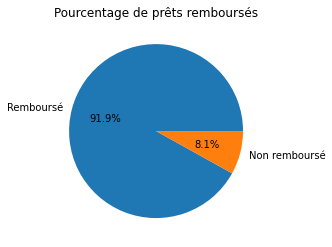

In [14]:
fig = plt.figure()
plt.pie(
    df_train['TARGET'].value_counts()/len(df_train)*100,
    autopct = '%1.1f%%',
    labels = ['Remboursé', 'Non remboursé']
       )
plt.title('Pourcentage de prêts remboursés')
plt.show()

In [15]:
# class imbalanced
# plus de prêts qui ont été remboursés à temps que de prêts qui n'ont pas été remboursés à temps

# On remarque que les catégories sont trés déséquilibrées.
# Une methode tel que SMOTE, Class Weight, undersampling devra être utilisée afin de pas biaiser les résultats de l'algorithme de scoring

In [16]:
# Number of each type of column
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [17]:
# Nb of unique classes in each object column
df_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [18]:
# La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques
# -> trouver un moyen de traiter ces variables catégorielles…

In [19]:
df_train.select_dtypes(include = ['float64']).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

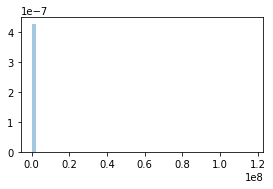

In [20]:
# Displots des variables quantitatives (variables continues seulement)

columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

nb_lignes = len(columns)/4 # 4 = nb max de displots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 50))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 4, index + 1)
    sns.distplot(x = df_train[col])
    plt.title(col)
    sns.despine() # pour enlever limites du graph en haut et à droite

figure.tight_layout()
plt.show()

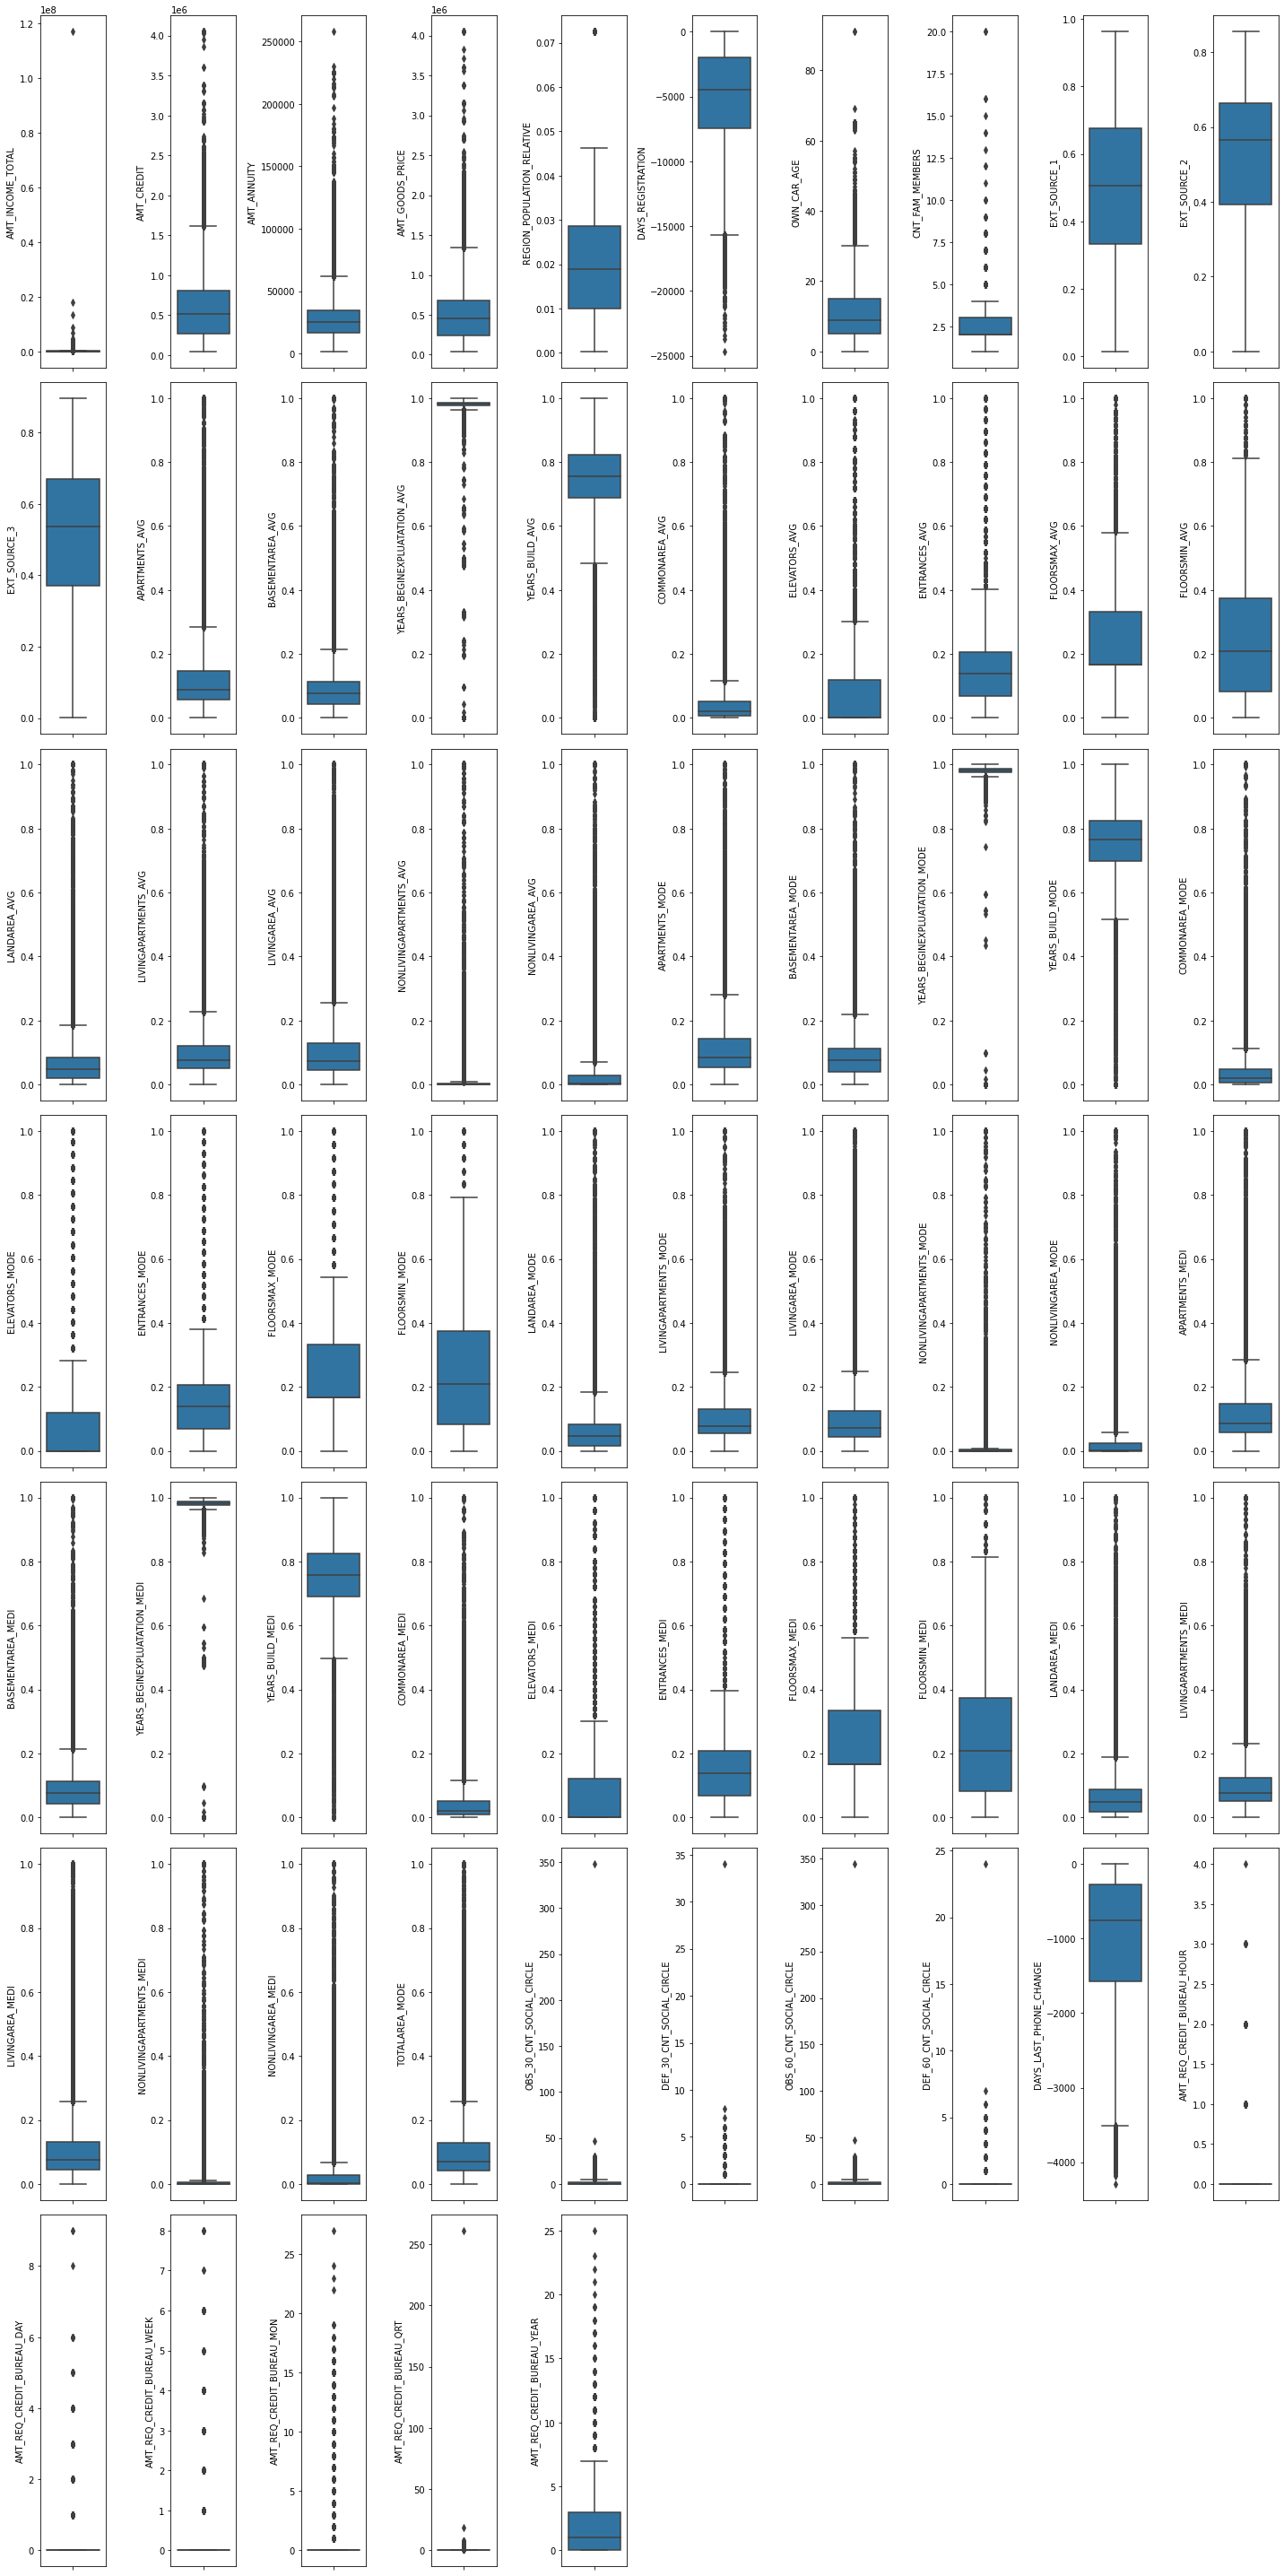

In [21]:
# Boxplots des variables quantitatives

columns = df_train.select_dtypes(include = ['float64']).columns
nb_lignes = len(columns)/10 # 10 = nb max de boxplots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 40))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 10, index + 1)
    sns.boxplot(y = col, data = df_train)
figure.tight_layout()
plt.show()

### Outliers, valeurs atypiques, anormales

In [22]:
########## Genre ##########
df_train['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [23]:
# Supprimer le code XNA
df_train = df_train.loc[df_train['CODE_GENDER'] != 'XNA']

In [24]:
########## Statut familial ##########
df_train['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [25]:
########## Days birth ##########
(df_train['DAYS_BIRTH'] / -365).describe()

count    307507.000000
mean         43.937061
std          11.956116
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

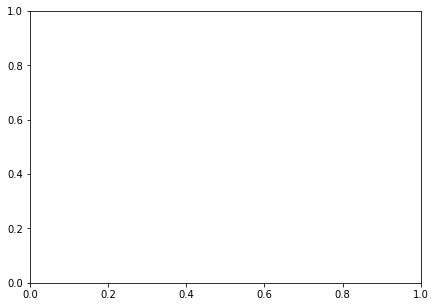

In [26]:
plt.figure(figsize = (7, 5))
sns.histplot((df_train['DAYS_BIRTH'] / -365), bins = 30).set_title('Age of client')
plt.show()

In [ ]:
# L'âge maximal est 69 et le minimal es 20 ans, il n'y a pas d'outliers.

In [27]:
########## Days employed ##########
df_train['DAYS_EMPLOYED'].describe()

count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

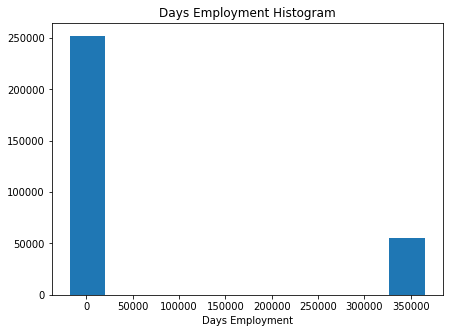

In [28]:
plt.figure(figsize = (7, 5))
plt.hist(df_train['DAYS_EMPLOYED'])
plt.title('Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [29]:
# 350000 jours -> 350000/365 = 959 ans -> problème quelquepart

# Création d'une variable pour indiquer quelles lignes étaient concernées par cette anomalie (clients ont peut-être renseigné de fausses infos)
df_train['DAYS_EMPLOYED_OUTLIERS'] = df_train['DAYS_EMPLOYED'] == 365243

# Remplacer les valeurs abérrantes par nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

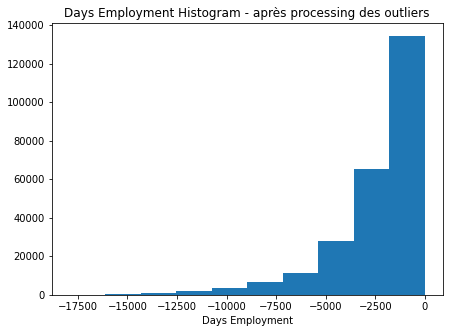

In [30]:
plt.figure(figsize = (7, 5))
plt.hist(df_train['DAYS_EMPLOYED'])
plt.title('Days Employment Histogram - après processing des outliers')
plt.xlabel('Days Employment')
plt.show()

#### Loan types

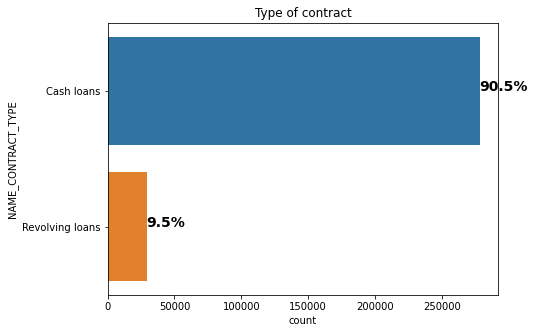

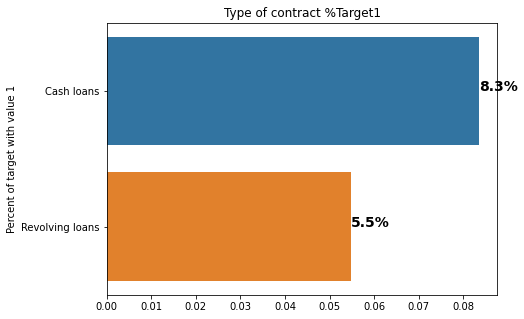

In [31]:
# NAME_CONTRACT_TYPE
# Distribution du type de prêts contractés + comparatif avec le pourcentage des prêts avec la valeur TARGET 1(prêt non retourné).

fonctions.plot_stat(df_train, 'NAME_CONTRACT_TYPE', 'Type of contract')
fonctions.plot_percent_target1(df_train, 'NAME_CONTRACT_TYPE', 'Type of contract %Target1')

In [32]:
# Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts
# dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

#### Client gender

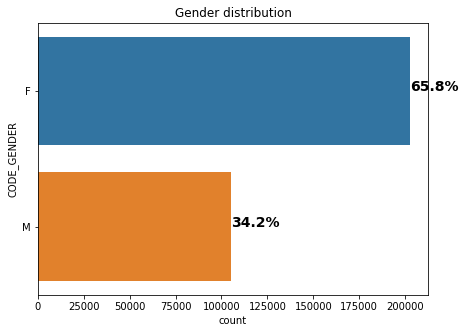

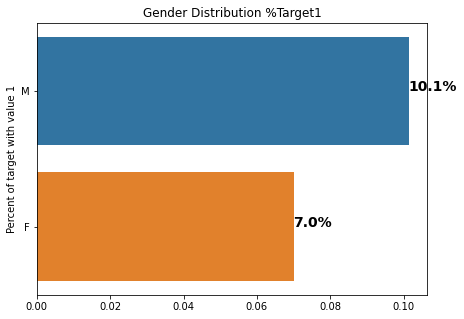

In [33]:
# Distribution H/F clients, mais aussi le pourcentage des prêts (par sexe du client) avec la valeur TARGET 1 (prêt non retourné).

#CODE_GENDER
fonctions.plot_stat(df_train, 'CODE_GENDER', 'Gender distribution')
fonctions.plot_percent_target1(df_train, 'CODE_GENDER', 'Gender Distribution %Target1')

In [34]:
# Le nombre de clients féminins est presque le double du nombre de clients masculins
# Les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

#### Flag own car

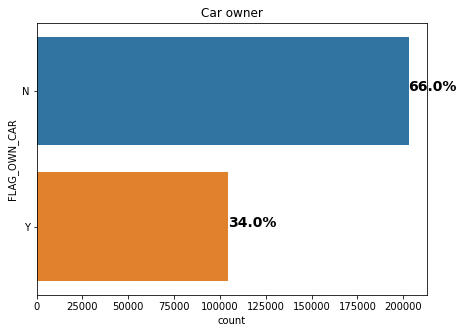

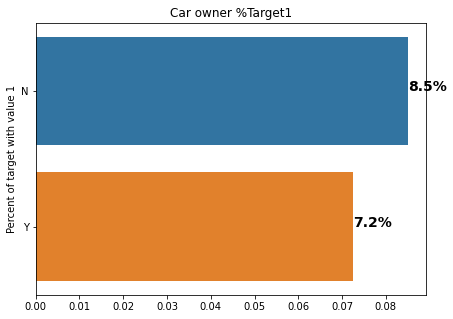

In [35]:
# Ceux qui ont une voiture vs ceux qui n'en ont pas

# FLAG_OWN_CAR
fonctions.plot_stat(df_train, 'FLAG_OWN_CAR', 'Car owner')
fonctions.plot_percent_target1(df_train, 'FLAG_OWN_CAR', 'Car owner %Target1')

In [36]:
# Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.
# -> a priori, pas d'impact

#### Name family status

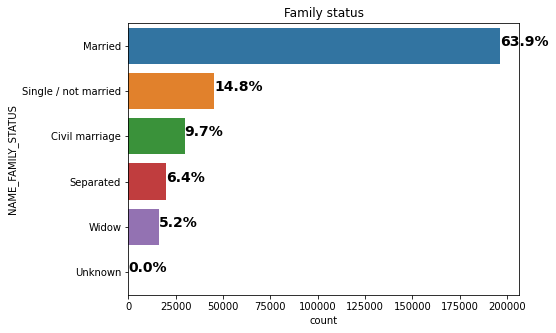

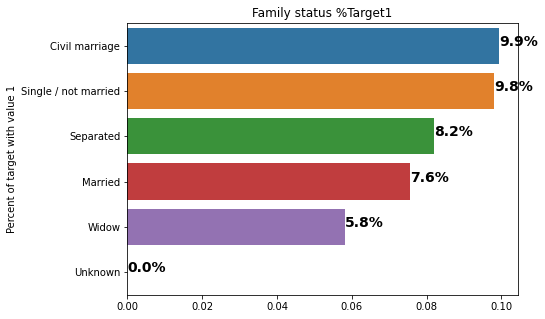

In [37]:
# NAME_FAMILY_STATUS
fonctions.plot_stat(df_train, 'NAME_FAMILY_STATUS', 'Family status')
fonctions.plot_percent_target1(df_train, 'NAME_FAMILY_STATUS', 'Family status %Target1')

In [38]:
# La plupart des clients sont mariés, suivis des célibataires / non mariés et des mariages civils.
# En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

#### Name Income Type

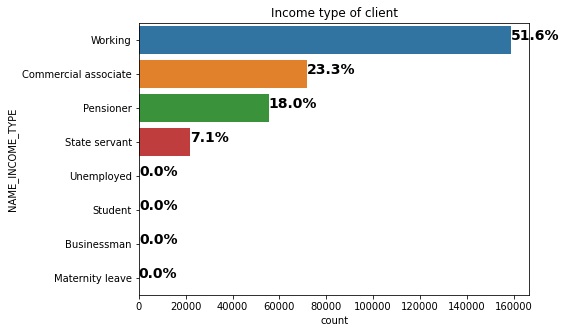

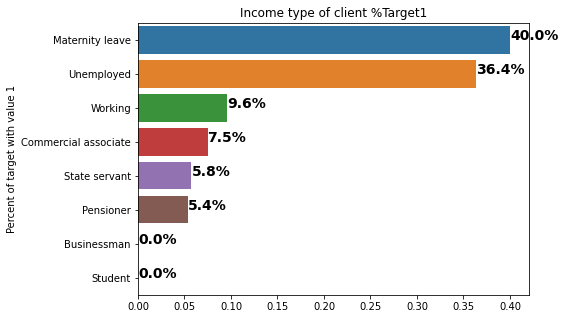

In [39]:
# NAME_INCOME_TYPE
fonctions.plot_stat(df_train, 'NAME_INCOME_TYPE', 'Income type of client')
fonctions.plot_percent_target1(df_train, 'NAME_INCOME_TYPE', 'Income type of client %Target1')

In [40]:
# La plupart des demandeurs de prêts sont des revenus du travail, suivis par un associé commercial, un retraité et un fonctionnaire.
# Les demandeurs avec le type de revenu Congé de maternité ont un ratio de près de 40% de prêts non remboursés, suivis des chômeurs (37%). Les autres types de revenus sont inférieurs à la moyenne de 10% pour ne pas rembourser les prêts.

#### Occupation type

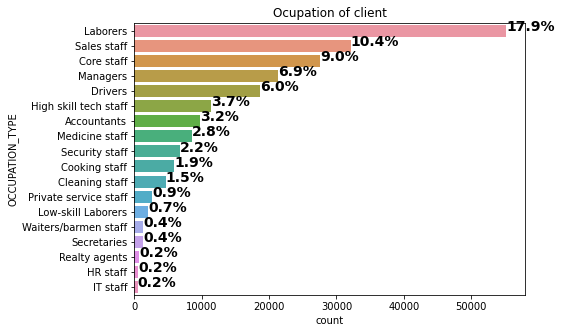

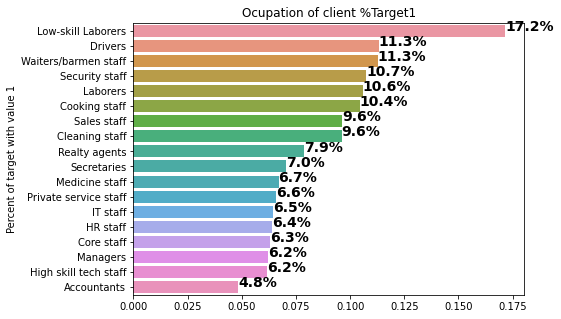

In [41]:
# OCCUPATION_TYPE
fonctions.plot_stat(df_train, 'OCCUPATION_TYPE', 'Ocupation of client')
fonctions.plot_percent_target1(df_train, 'OCCUPATION_TYPE', 'Ocupation of client %Target1')

In [42]:
# La plupart des prêts sont contractés par des ouvriers, suivis par les vendeurs/commerciaux. Le personnel informatique prend le montant de prêts le plus bas.
# La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

#### Name education type

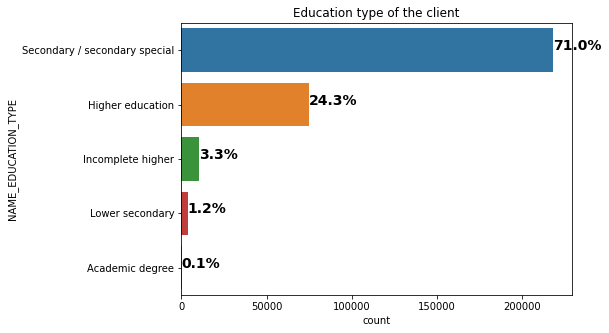

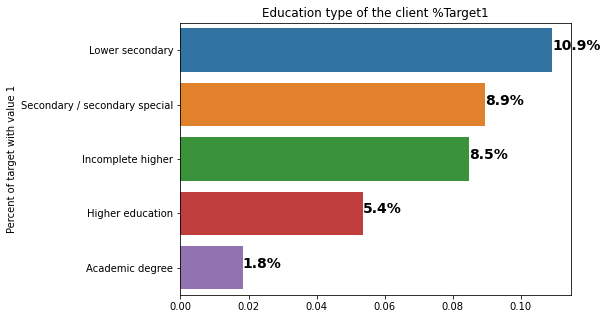

In [43]:
# NAME_EDUCATION_TYPE
fonctions.plot_stat(df_train, 'NAME_EDUCATION_TYPE', 'Education type of the client')
fonctions.plot_percent_target1(df_train, 'NAME_EDUCATION_TYPE', 'Education type of the client %Target1')

In [44]:
#La majorité des clients ont une éducation dans l'éducation secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.
#La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

#### Name housing type

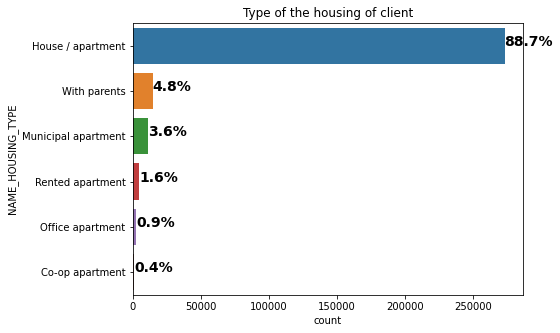

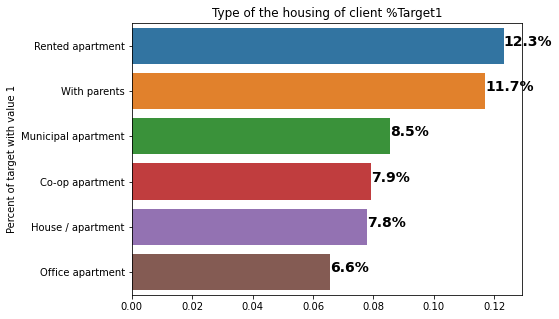

In [45]:
# NAME_HOUSING_TYPE
fonctions.plot_stat(df_train, 'NAME_HOUSING_TYPE', 'Type of the housing of client')
fonctions.plot_percent_target1(df_train, 'NAME_HOUSING_TYPE', 'Type of the housing of client %Target1')

In [46]:
#Plus de 250 000 demandeurs de crédits vivent en maison ou appartement. Les catégories suivantes, faible pourcentage, représentent une population moins "indépendante" (vivre chez ses parents, etc…).
# Dans ces catégories, les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.

### Corrélations

In [47]:
# Find the correlation of the positive days since birth and target
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.078242160036194

In [48]:
# un client plus âgé sera moins susceptible de faire défaut au remboursement de son crédit

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

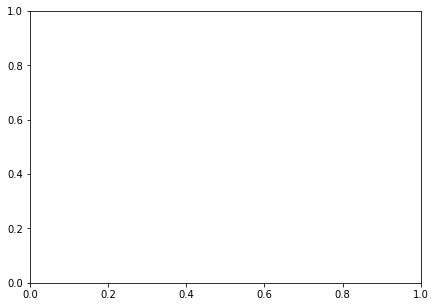

In [49]:
# Effet de l'age sur le remboursement du prêt

plt.figure(figsize = (7, 5))
sns.kdeplot(df_train[df_train['TARGET'] == 0]['DAYS_BIRTH'] / -365, label = 'TARGET 0')
sns.kdeplot(df_train[df_train['TARGET'] == 1]['DAYS_BIRTH'] / -365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
plt.show()

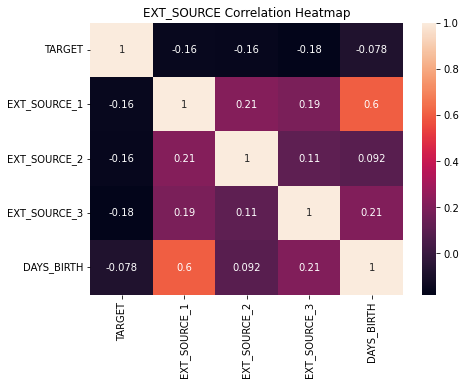

In [50]:
#Heatmap of correlations
plt.figure(figsize = (7, 5))
sns.heatmap(df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(), annot = True)
plt.title('EXT_SOURCE Correlation Heatmap')
plt.show()

In [51]:
# Ces sources extérieures sont corrélées négativement avec la Target (Attention, négativement mais avec de très faibles coefficients).
# on peut penser que si la valeur augmente, le client est plus susceptible de pouvoir rembourser le crédit. 
# 'DAYS_BIRTH' est corrélée avec 'EXT_SOURCE_1', peut-être l'un des facteurs de ce score est l'âge du client.

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

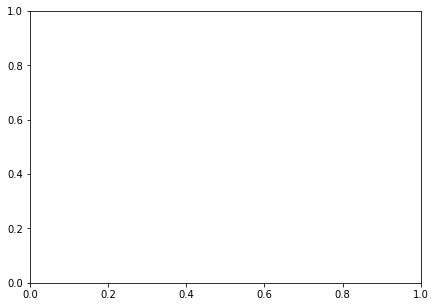

In [52]:
fonctions.plot_distribution(df_train, 'AMT_CREDIT', 'Credit distribution')
fonctions.plot_distribution(df_train, 'AMT_ANNUITY', 'Annuity distribution')
fonctions.plot_distribution(df_train, 'AMT_GOODS_PRICE', 'Goods price distribution')
fonctions.plot_distribution(df_train, 'DAYS_REGISTRATION', 'Days of registration distribution')

### EDA bureau.csv

In [ ]:
# Bureau data

# contient tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au Bureau de crédit (pour les clients qui ont un prêt dans l'échantillon).
#Pour chaque prêt de l'échantillon, il y a autant de lignes que de nombre de crédits que le client avait au bureau de crédit avant la date de la demande.
# SK_ID_CURR est la clé reliant les données application_train | test aux données du bureau.

In [57]:
application_bureau_train = df_train.merge(df_bureau, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'left')
application_bureau_train

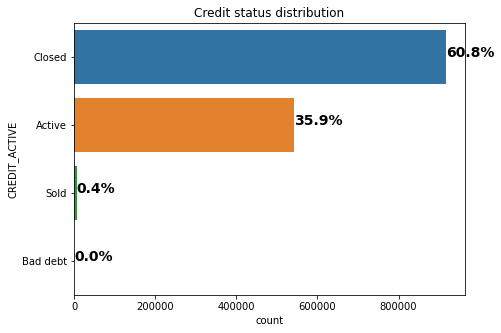

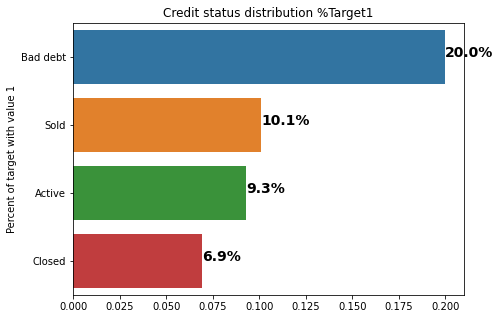

In [58]:
# CREDIT_ACTIVE
fonctions.plot_stat(application_bureau_train, 'CREDIT_ACTIVE', 'Credit status distribution')
fonctions.plot_percent_target1(application_bureau_train, 'CREDIT_ACTIVE', 'Credit status distribution %Target1')

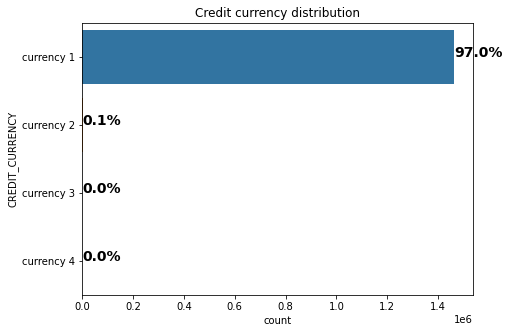

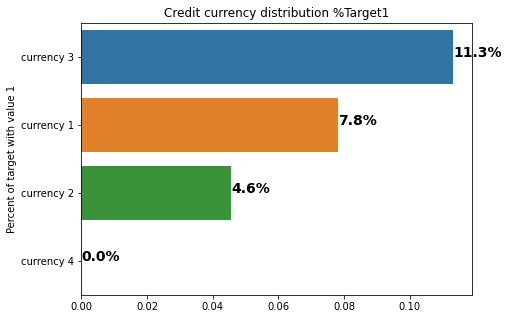

In [59]:
# CREDIT_CURRENCY
fonctions.plot_stat(application_bureau_train, 'CREDIT_CURRENCY', 'Credit currency distribution')
fonctions.plot_percent_target1(application_bureau_train, 'CREDIT_CURRENCY', 'Credit currency distribution %Target1')

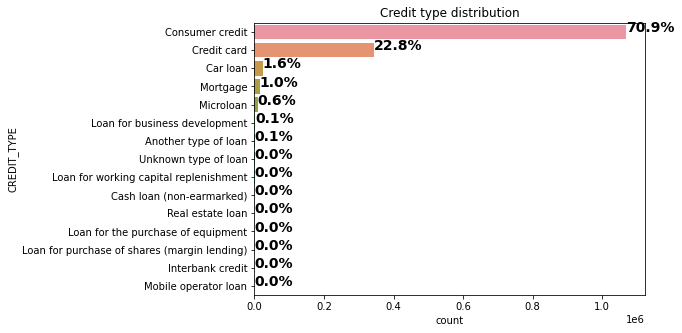

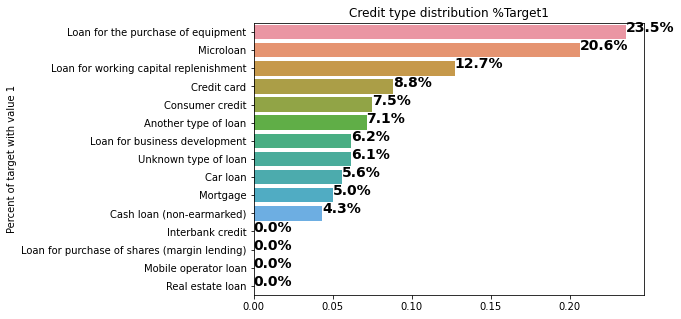

In [60]:
# CREDIT_TYPE
fonctions.plot_stat(application_bureau_train, 'CREDIT_TYPE', 'Credit type distribution')
fonctions.plot_percent_target1(application_bureau_train, 'CREDIT_TYPE', 'Credit type distribution %Target1')

### EDA previous_application.csv

In [ ]:
# Previous application data

# -> contient des informations sur toutes les demandes précédentes de crédit immobilier des clients qui ont des prêts dans l'échantillon
# Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données
# SK_ID_CURR est la clé reliant les données application_train | test aux données previous_application.

In [64]:
application_prev_train = application_bureau_train.merge(df_previous_application, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'left')
application_prev_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,currency 1,-1125.0,0.0,-1038.0,-1038.0,NaN,0.0,40761.0,NaN,NaN,0.0,Credit card,-1038.0,0.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,currency 1,-476.0,0.0,NaN,-48.0,NaN,0.0,0.0,0.0,NaN,0.0,Credit card,-47.0,NaN,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,currency 1,-1437.0,0.0,-1072.0,-1185.0,0.000,0.0,135000.0,0.0,0.0,0.0,Consumer credit,-1185.0,0.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary spec

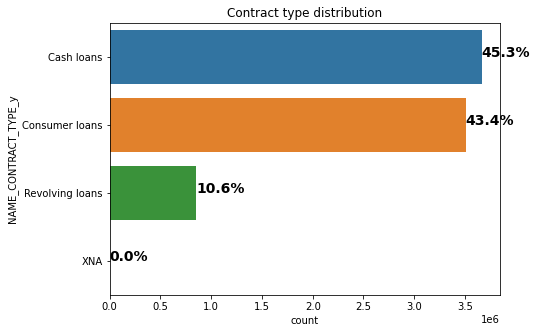

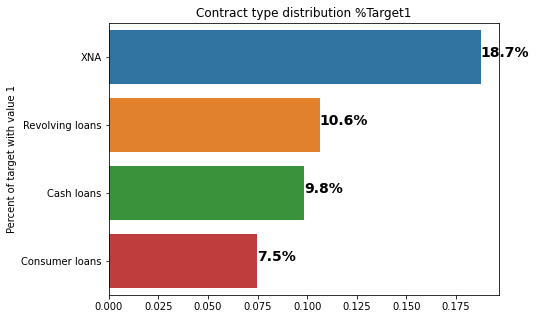

In [65]:
# NAME_CONTRACT_TYPE_y
fonctions.plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y', 'Contract type distribution')
fonctions.plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y', 'Contract type distribution %Target1')

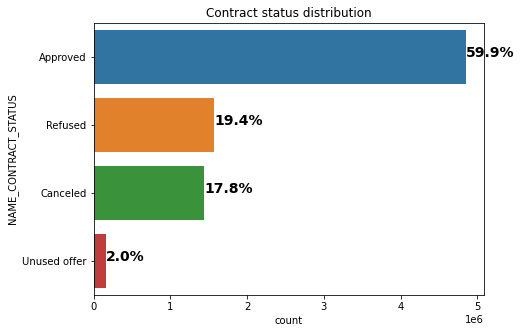

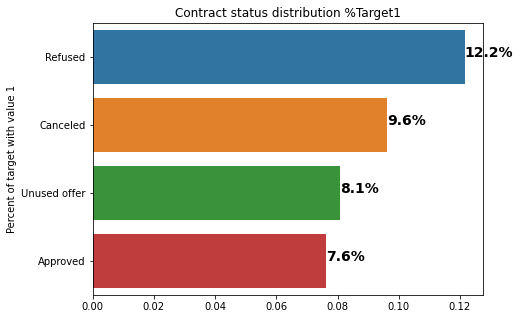

In [66]:
# NAME_CONTRACT_STATUS
fonctions.plot_stat(application_prev_train, 'NAME_CONTRACT_STATUS', 'Contract status distribution')
fonctions.plot_percent_target1(application_prev_train, 'NAME_CONTRACT_STATUS', 'Contract status distribution %Target1')

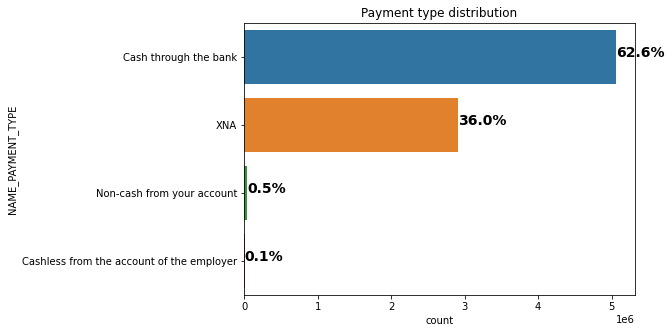

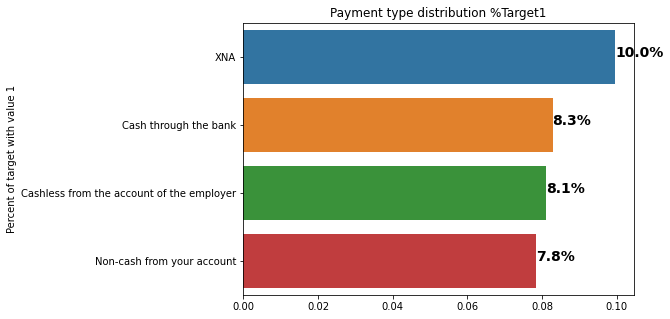

In [67]:
# NAME_PAYMENT_TYPE
fonctions.plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE', 'Payment type distribution')
fonctions.plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE', 'Payment type distribution %Target1')

In [ ]:
# Le mode de paiement se fait majoritairement en Cash via la banque.
# Le remboursement du crédit en cas de défaillance (Target 1) ne se dintingue sur aucun type de paiement, l'égalité est quasi parfaite.

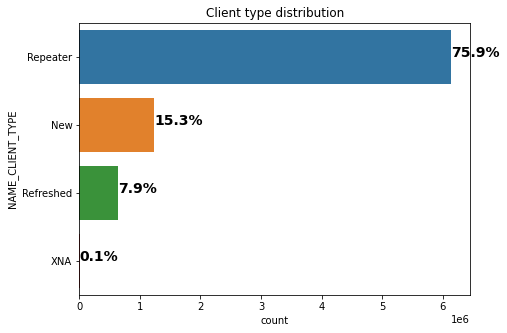

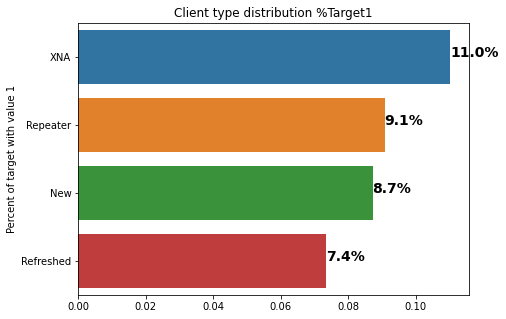

In [68]:
# NAME_CLIENT_TYPE
fonctions.plot_stat(application_prev_train, 'NAME_CLIENT_TYPE', 'Client type distribution')
fonctions.plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE', 'Client type distribution %Target1')

## Merging et agrégations des données

``bureau : bureau.csv``

In [69]:
display(df_bureau.head())
display(df_bureau.shape)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


(1716428, 17)

Calcul du nombre total des précédents crédits pris par chaque client. Ce type d'information viendra enrichir l'échantillon de travail… 

In [70]:
#Total number of previous credits taken by each customer
previous_loan_counts = df_bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

,SK_ID_CURR,PREVIOUS_LOANS_COUNT
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [71]:
# Merge this new column in our data sample
data = df_train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
data.shape

(307507, 124)

``bureau_balance : bureau_balance.csv``

In [72]:
display(df_bureau_balance.head())
display(df_bureau_balance.shape)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


(27299925, 3)

In [73]:
# Monthly average balances of previous credits in Credit Bureau.
bureau_bal_mean = df_bureau_balance.groupby('SK_ID_BUREAU', as_index = False).agg({'MONTHS_BALANCE' : 'mean', 'STATUS' : 'first'}).rename(columns = {'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'})
bureau_bal_mean.head()

,SK_ID_BUREAU,MONTHS_BALANCE_MEAN,STATUS
0,5001709,-48.0,C
1,5001710,-41.0,C
2,5001711,-1.5,X
3,5001712,-9.0,C
4,5001713,-10.5,X


In [74]:
bureau_full = df_bureau.merge(bureau_bal_mean, on = 'SK_ID_BUREAU', how = 'inner')
bureau_full.drop('SK_ID_BUREAU', axis = 1, inplace = True)
display(bureau_full.head())
display(bureau_full.shape)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_MEAN,STATUS
0,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-13.0,C
1,380361,Active,currency 1,-357,0,1119.0,NaN,NaN,0,45000.0,0.0,45000.0,0.0,Credit card,-130,2691.0,-5.5,C
2,380361,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0,-17.5,C
3,380361,Closed,currency 1,-993,0,31039.0,-831.0,NaN,0,315000.0,0.0,0.0,0.0,Credit card,-818,0.0,-16.0,C
4,380361,Closed,currency 1,-1146,0,681.0,-780.0,NaN,0,2025000.0,0.0,0.0,0.0,Consumer credit,-769,0.0,-18.5,C


(774354, 18)

In [75]:
bureau_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774354 entries, 0 to 774353
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              774354 non-null  int64  
 1   CREDIT_ACTIVE           774354 non-null  object 
 2   CREDIT_CURRENCY         774354 non-null  object 
 3   DAYS_CREDIT             774354 non-null  int64  
 4   CREDIT_DAY_OVERDUE      774354 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     723869 non-null  float64
 6   DAYS_ENDDATE_FACT       490889 non-null  float64
 7   AMT_CREDIT_MAX_OVERDUE  234704 non-null  float64
 8   CNT_CREDIT_PROLONG      774354 non-null  int64  
 9   AMT_CREDIT_SUM          774349 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     662000 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    477791 non-null  float64
 12  AMT_CREDIT_SUM_OVERDUE  774354 non-null  float64
 13  CREDIT_TYPE             774354 non-null  object 
 14  DAYS_CREDIT_UPDATE  

In [76]:
bureau_full.columns

Index(['SK_ID_CURR', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY',
       'MONTHS_BALANCE_MEAN', 'STATUS'],
      dtype='object')

In [77]:
bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index = False).agg({
    'CREDIT_ACTIVE' : 'first',
    'CREDIT_CURRENCY': 'first',
    'DAYS_CREDIT' : 'mean',
    'CREDIT_DAY_OVERDUE' : 'mean',
    'DAYS_CREDIT_ENDDATE' : 'mean',
    'DAYS_ENDDATE_FACT' : 'mean',
    'AMT_CREDIT_MAX_OVERDUE' : 'mean',
    'CNT_CREDIT_PROLONG' : 'mean',
    'AMT_CREDIT_SUM' : 'mean',
    'AMT_CREDIT_SUM_DEBT' : 'mean',
    'AMT_CREDIT_SUM_LIMIT' : 'mean',
    'AMT_CREDIT_SUM_OVERDUE' : 'mean',
    'CREDIT_TYPE' : 'first',
    'DAYS_CREDIT_UPDATE' : 'mean',
    'AMT_ANNUITY' : 'mean',
    'MONTHS_BALANCE_MEAN' : 'mean',
    'STATUS' : 'first'
    }).add_prefix('PREV_BUR_MEAN_')
bureau_mean = bureau_mean.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
bureau_mean.shape

(134542, 18)

In [78]:
# Merge all this features with our data sample
data = data.merge(bureau_mean, on = 'SK_ID_CURR', how = 'left')
data.shape

(307507, 141)

Notons l'enrichissement avec 13 nouvelles features, créées et ajoutées à notre ensemble de données application train/test appelé ``data``.

``previous_application``

Vérification des valeurs de 'SK_ID_CURR' entre data et previous_application…

In [79]:
display(df_previous_application.head())
display(df_previous_application.shape)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


(1670214, 37)

In [80]:
#Check 
len(df_previous_application.SK_ID_CURR.isin(data.SK_ID_CURR)) == len(df_previous_application)

True

Comme précédemment, commençons par quantifier le nombre de demandes précédentes des clients au crédit immobilier et ajoutons cette données à l'échantillon.

In [81]:
#Number of previous applications of the clients to Home Credit
previous_application_counts = df_previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

,SK_ID_CURR,PREVIOUS_APPLICATION_COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [82]:
#Merge this new column in our data sample
data = data.merge(previous_application_counts, on = 'SK_ID_CURR', how = 'left')
data.shape

(307507, 142)

``credit_card_balance``

In [83]:
display(df_credit_card_balance.head())
display(df_credit_card_balance.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


(3840312, 23)

In [84]:
df_credit_card_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [85]:
df_credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     int64  
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECIVABLE               float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    float64
 15  CNT_DRAWINGS_CURRENT        int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  float64
 17  CNT_DRAWINGS_POS_CURRENT    float64
 18  CNT_INSTALMENT_MATURE_CUM   float64
 19  NAME_CONTRACT_STATUS 

In [86]:
df_credit_card_balance.columns

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [87]:
credit_card_balance_mean = df_credit_card_balance.groupby('SK_ID_PREV', as_index = False).agg({
    'MONTHS_BALANCE' : 'mean',
    'AMT_BALANCE' : 'mean',
    'AMT_CREDIT_LIMIT_ACTUAL' : 'mean',
    'AMT_DRAWINGS_ATM_CURRENT' : 'mean',
    'AMT_DRAWINGS_CURRENT' : 'mean',
    'AMT_DRAWINGS_OTHER_CURRENT' : 'mean',
    'AMT_DRAWINGS_POS_CURRENT' : 'mean',
    'AMT_INST_MIN_REGULARITY' : 'mean',
    'AMT_PAYMENT_CURRENT' : 'mean',
    'AMT_PAYMENT_TOTAL_CURRENT' : 'mean',
    'AMT_RECEIVABLE_PRINCIPAL' : 'mean',
    'AMT_RECIVABLE' : 'mean',
    'AMT_TOTAL_RECEIVABLE' : 'mean',
    'CNT_DRAWINGS_ATM_CURRENT' : 'mean',
    'CNT_DRAWINGS_CURRENT' : 'mean',
    'CNT_DRAWINGS_OTHER_CURRENT' : 'mean',
    'CNT_DRAWINGS_POS_CURRENT' : 'mean',
    'CNT_INSTALMENT_MATURE_CUM' : 'mean',
    'NAME_CONTRACT_STATUS' : 'first',
    'SK_DPD' : 'mean',
    'SK_DPD_DEF' : 'mean'
}).add_prefix('CARD_MEAN_')
credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
credit_card_balance_mean.shape

(104307, 22)

In [88]:
#Merge with previous_application
previous_application = df_previous_application.merge(credit_card_balance_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 58)

``installments_payments``

In [89]:
display(df_installments_payments.head())
display(df_installments_payments.shape)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


(13605401, 8)

In [90]:
df_installments_payments.drop('SK_ID_CURR', axis = 1, inplace = True)

In [91]:
install_pay_mean = df_installments_payments.groupby('SK_ID_PREV', as_index = False).mean().add_prefix('INSTALL_MEAN_')
install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
install_pay_mean.shape

(997752, 7)

In [92]:
#Merge with previous_application
previous_application = previous_application.merge(install_pay_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 64)

``POS_CASH_balance``

In [93]:
display(df_pos_cash_balance.head())
display(df_pos_cash_balance.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


(10001358, 8)

In [94]:
df_pos_cash_balance.drop('SK_ID_CURR', axis = 1, inplace = True)

In [95]:
POS_mean = df_installments_payments.groupby('SK_ID_PREV', as_index = False).mean().add_prefix('POS_MEAN_')
POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
POS_mean.shape

(997752, 7)

In [96]:
#Merge with previous_application
previous_application = previous_application.merge(POS_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 70)

``previous_application``

Retour sur ``previous_application`` pour assembles les lignes d'observation selon 'SK_ID_CURR'.

In [97]:
display(previous_application.head())
display(previous_application.shape)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CARD_MEAN_MONTHS_BALANCE,CARD_MEAN_AMT_BALANCE,CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,CARD_MEAN_AMT_DRAWINGS_CURRENT,CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,CARD_MEAN_AMT_INST_MIN_REGULARITY,CARD_MEAN_AMT_PAYMENT_CURRENT,CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,CARD_MEAN_AMT_RECIVABLE,CARD_MEAN_AMT_TOTAL_RECEIVABLE,CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,CARD_MEAN_CNT_DRAWINGS_CURRENT,CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,CARD_MEAN_NAME_CONTRACT_STATUS,CARD_MEAN_SK_DPD,CARD_MEAN_SK_DPD_DEF,INSTALL_MEAN_NUM_INSTALMENT_VERSION,INSTALL_MEAN_NUM_INSTALMENT_NUMBER,INSTALL_MEAN_DAYS_INSTALMENT,INSTALL_MEAN_DAYS_ENTRY_PAYMENT,INSTALL_MEAN_AMT_INSTALMENT,INSTALL_MEAN_AMT_PAYMENT,POS_MEAN_NUM_INSTALMENT_VERSION,POS_MEAN_NUM_INSTALMENT_NUMBER,POS_MEAN_DAYS_INSTALMENT,POS_MEAN_DAYS_ENTRY_PAYMENT,POS_MEAN_AMT_INSTALMENT,POS_MEAN_AMT_PAYMENT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.0,-42.0,-42.000000,17284.275000,17284.275000,2.000000,1.0,-42.0,-42.000000,17284.275000,17284.275000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.0,-74.0,-83.200000,25188.615000,25188.615000,1.000000,3.0,-74.0,-83.200000,25188.615000,25188.615000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.0,-151.0,-159.222222,15060.735000,15060.735000,1.000000,5.0,-151.0,-159.222222,15060.735000,15060.735000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.090909,6.0,-332.0,-339.090909,51193.943182,51193.943182,1.090909,6.0,-332.0,-339.090909,51193.943182,51193.943182
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1670214, 70)

In [98]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'CARD_MEAN_MONTHS_BALANCE', 'CARD_MEAN_AMT_BALANCE',
       'CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL',
       'CARD_MEA

In [99]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 70 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   SK_ID_PREV                            1670214 non-null  int64  
 1   SK_ID_CURR                            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE                    1670214 non-null  object 
 3   AMT_ANNUITY                           1297979 non-null  float64
 4   AMT_APPLICATION                       1670214 non-null  float64
 5   AMT_CREDIT                            1670213 non-null  float64
 6   AMT_DOWN_PAYMENT                      774370 non-null   float64
 7   AMT_GOODS_PRICE                       1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START            1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START               1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT           1670214 non-null

In [100]:
prev_appl_mean = previous_application.groupby('SK_ID_CURR', as_index = False).agg({
    'SK_ID_PREV' : 'mean',
    'SK_ID_CURR' : 'mean',
    'NAME_CONTRACT_TYPE' : 'first',
    'AMT_ANNUITY' : 'mean',
    'AMT_APPLICATION' : 'mean', 'AMT_CREDIT' : 'mean', 'AMT_DOWN_PAYMENT' : 'mean', 'AMT_GOODS_PRICE' : 'mean',
    'WEEKDAY_APPR_PROCESS_START' : 'first', 'HOUR_APPR_PROCESS_START' : 'mean',
    'FLAG_LAST_APPL_PER_CONTRACT' : 'first', 'NFLAG_LAST_APPL_IN_DAY' : 'mean',
    'RATE_DOWN_PAYMENT' : 'mean', 'RATE_INTEREST_PRIMARY' : 'mean',
    'RATE_INTEREST_PRIVILEGED' : 'mean', 'NAME_CASH_LOAN_PURPOSE' : 'first',
    'NAME_CONTRACT_STATUS' : 'first', 'DAYS_DECISION' : 'mean', 'NAME_PAYMENT_TYPE' : 'first',
    'CODE_REJECT_REASON' : 'first', 'NAME_TYPE_SUITE' : 'first', 'NAME_CLIENT_TYPE' : 'first',
    'NAME_GOODS_CATEGORY' : 'first', 'NAME_PORTFOLIO' : 'first', 'NAME_PRODUCT_TYPE' : 'first',
    'CHANNEL_TYPE' : 'first', 'SELLERPLACE_AREA' : 'mean', 'NAME_SELLER_INDUSTRY' : 'first',
       'CNT_PAYMENT' : 'mean', 'NAME_YIELD_GROUP' : 'first', 'PRODUCT_COMBINATION' : 'first',
       'DAYS_FIRST_DRAWING' : 'mean', 'DAYS_FIRST_DUE' : 'mean', 'DAYS_LAST_DUE_1ST_VERSION' : 'mean',
       'DAYS_LAST_DUE' : 'mean', 'DAYS_TERMINATION' : 'mean', 'NFLAG_INSURED_ON_APPROVAL' : 'mean',
       'CARD_MEAN_MONTHS_BALANCE' : 'mean', 'CARD_MEAN_AMT_BALANCE' : 'mean',
       'CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT' : 'mean', 'CARD_MEAN_AMT_DRAWINGS_CURRENT' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_POS_CURRENT' : 'mean',
       'CARD_MEAN_AMT_INST_MIN_REGULARITY' : 'mean', 'CARD_MEAN_AMT_PAYMENT_CURRENT' : 'mean',
       'CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT' : 'mean',
       'CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL' : 'mean', 'CARD_MEAN_AMT_RECIVABLE' : 'mean',
       'CARD_MEAN_AMT_TOTAL_RECEIVABLE' : 'mean', 'CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_POS_CURRENT' : 'mean',
       'CARD_MEAN_CNT_INSTALMENT_MATURE_CUM' : 'mean', 'CARD_MEAN_NAME_CONTRACT_STATUS' : 'first',
       'CARD_MEAN_SK_DPD' : 'mean', 'CARD_MEAN_SK_DPD_DEF' : 'mean',
       'INSTALL_MEAN_NUM_INSTALMENT_VERSION' : 'mean',
       'INSTALL_MEAN_NUM_INSTALMENT_NUMBER' : 'mean', 'INSTALL_MEAN_DAYS_INSTALMENT' : 'mean',
       'INSTALL_MEAN_DAYS_ENTRY_PAYMENT' : 'mean', 'INSTALL_MEAN_AMT_INSTALMENT' : 'mean',
       'INSTALL_MEAN_AMT_PAYMENT' : 'mean', 'POS_MEAN_NUM_INSTALMENT_VERSION' : 'mean',
       'POS_MEAN_NUM_INSTALMENT_NUMBER' : 'mean', 'POS_MEAN_DAYS_INSTALMENT' : 'mean',
       'POS_MEAN_DAYS_ENTRY_PAYMENT' : 'mean', 'POS_MEAN_AMT_INSTALMENT' : 'mean',
       'POS_MEAN_AMT_PAYMENT' : 'mean'
}).add_prefix('PREV_APPL_MEAN_')

In [101]:
prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace = True)
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis = 1)

In [102]:
display(prev_appl_mean.head())
display(prev_appl_mean.shape)

,SK_ID_CURR,PREV_APPL_MEAN_NAME_CONTRACT_TYPE,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_APPLICATION,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_AMT_GOODS_PRICE,PREV_APPL_MEAN_WEEKDAY_APPR_PROCESS_START,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_FLAG_LAST_APPL_PER_CONTRACT,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_RATE_INTEREST_PRIMARY,PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED,PREV_APPL_MEAN_NAME_CASH_LOAN_PURPOSE,PREV_APPL_MEAN_NAME_CONTRACT_STATUS,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_NAME_PAYMENT_TYPE,PREV_APPL_MEAN_CODE_REJECT_REASON,PREV_APPL_MEAN_NAME_TYPE_SUITE,PREV_APPL_MEAN_NAME_CLIENT_TYPE,PREV_APPL_MEAN_NAME_GOODS_CATEGORY,PREV_APPL_MEAN_NAME_PORTFOLIO,PREV_APPL_MEAN_NAME_PRODUCT_TYPE,PREV_APPL_MEAN_CHANNEL_TYPE,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_NAME_SELLER_INDUSTRY,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_NAME_YIELD_GROUP,PREV_APPL_MEAN_PRODUCT_COMBINATION,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_NAME_CONTRACT_STATUS,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT
0,100001.0,Consumer loans,3951.000,24835.50,23787.00,2520.0,24835.5,FRIDAY,13.000000,Y,1.0,0.104326,NaN,NaN,XAP,Approved,-1740.0,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23.0,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000
1,100002.0,Consumer loans,9251.775,179055.00,179055.00,0.0,179055.0,SATURDAY,9.000000,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003.0,Cash loans,56553.990,435436.50,484191.00,3442.5,435436.5,FRIDAY,14.666667,Y,1.0,0.050030,NaN,NaN,XNA,Approved,-1305.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,533.0,XNA,10.0,low_normal,Cash X-Sell: low,365243.0,-1

(338857, 69)

In [103]:
#Reminder…
print('data shape', data.shape)

data shape (307507, 142)


In [104]:
#Last merge with our data sample
data = data.merge(prev_appl_mean, on = 'SK_ID_CURR', how = 'inner')
#data.set_index('SK_ID_CURR', inplace=True)
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,PREV_APPL_MEAN_NAME_TYPE_SUITE,PREV_APPL_MEAN_NAME_CLIENT_TYPE,PREV_APPL_MEAN_NAME_GOODS_CATEGORY,PREV_APPL_MEAN_NAME_PORTFOLIO,PREV_APPL_MEAN_NAME_PRODUCT_TYPE,PREV_APPL_MEAN_CHANNEL_TYPE,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_NAME_SELLER_INDUSTRY,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_NAME_YIELD_GROUP,PREV_APPL_MEAN_PRODUCT_COMBINATION,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_NAME_CONTRACT_STATUS,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,None,New,Vehicles,POS,XNA,Stone,500.000000,Auto technology,24.000000,low_normal,POS other with interest,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and ca

(291053, 210)

***50 nouvelles features ont été ajoutées à l'échantillon suite aux opérations de merging.***

## Features engineering
Il peut être pertinent d'enrichir l'échantillon par un ajout de variables spécifiques à la problématique métier. N'étant pas spécialisé dans l'expertise des crédits, on pourra mener les modélisations avec une étape de features selection qui déterminera la pertinence de ces variables, ainsi que toutes les autres variables de l'échantillon.

### 3 features extraites des précédentes étapes
Pour rappel, les étapes précédentes consistaient uniquement à établir des liens entre nos fichiers, des fusions de table dans le but d'enrichir l'échantillon de travail. Ceci étant, avant de procéder au merging des éléments, on a pu facilement extraire __3 variables de moyenne et de comptage__.

``PREVIOUS_LOANS_COUNT`` from bureau.csv: Nombre total des précédents crédits pris par chaque client\
``MONTHS_BALANCE_MEAN`` from bureau_balance.csv: Solde moyen mensuel des précédents crédits\
``PREVIOUS_APPLICATION_COUNT`` from previous_application.csv: Nombre de demandes antérieures des clients au crédit immobilier



### Création de 4 nouvelles variables métiers
Sans être expert en crédit bancaire, on peut assez facilement apporter quelques ratios explicatifs. D'autant plus qu'une veille parallèle permet de mieux comprendre les enjeux attendus. Voyons ci-dessous quelles features est-il pertinent d'intégrer.

``CREDIT_INCOME_PERCENT``: Pourcentage du montant du crédit par rapport au revenu d'un client\
``ANNUITY_INCOME_PERCENT``: Pourcentage de la rente de prêt par rapport au revenu d'un client\
``CREDIT_TERM``: Durée du paiement en mois\
``DAYS_EMPLOYED_PERCENT``: Pourcentage des jours employés par rapport à l'âge du client

In [105]:
#Before…
data.shape

(291053, 210)

In [108]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT',
       'PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT',
       'PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT',
       'PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT',
       'PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION',
       'PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER',
       'PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT',
       'PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT',
       'PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT',
       'PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT'],
      dtype='object', length=210)

In [109]:
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

In [110]:
#After…
data.shape

(291053, 214)

In [111]:
#New Variables from features engineering
features_engin = ['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

In [112]:
#Display correlations with features engineering
print('Most Positive Correlations:\n', data.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', data.corr()['TARGET'].sort_values().head(15))

ValueError: could not convert string to float: 'Cash loans'

Les corrélations explicitées précédemment n'ont pas évoluées suite à l'extraction des 7 features.

In [114]:
# Export données mergées au format pickle

# Chemin d'accès aux données (à modifier si code en local)
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'data/df_merged')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(data, f)

## Preprocessing des données

### Split train / test data
Il est nécessaire de commencer par la mise en place des données d'entrainement / test. On peut procéder en rappel avec les jeux de données application_train/test.

In [118]:
data_train = data[data['SK_ID_CURR'].isin(df_train.SK_ID_CURR)]
data_test = data[data['SK_ID_CURR'].isin(df_test.SK_ID_CURR)]

data_test = data_test.drop('TARGET', axis = 1)

In [119]:
data_train.set_index('SK_ID_CURR', inplace = True)
data_test.set_index('SK_ID_CURR', inplace = True)

In [120]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291053, 213)
Testing Features shape with categorical columns:  (0, 212)


### Encoding categorical features 


In [121]:
# Create a label encoder object
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data_train:
    # If 2 or fewer unique categories
    if data_train.loc[:,col].dtype == 'object' and len(list(data_train.loc[:,col].unique())) <= 2:
        # Train on the training data
        le.fit(data_train.loc[:,col])
        # Transform both training and testing data
        data_train.loc[:,col] = le.transform(data_train.loc[:,col])

        count += 1
            
print('%d columns were label encoded.' % count)

5 columns were label encoded.


In [122]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291053, 213)
Testing Features shape with categorical columns:  (0, 212)


In [123]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [124]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291053, 483)
Testing Features shape with categorical columns:  (0, 175)


In [125]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis = 1, inplace = True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

In [126]:
print(data_train.shape)
print(data_test.shape)

(291053, 175)
(0, 175)


In [127]:
#Copy before imputation of missing values
train = data_train.copy()
train.shape

(291053, 175)

### Imputation des valeurs manquantes 
L'une des approches les plus simples consiste à remplacer les NaN par la Médiane (ou Moyenne) pour les variables  correspondantes.

In [128]:
print('Missing values in train data: ', sum(data_train.isnull().sum()))

Missing values in train data:  15918888


In [129]:
data_train.dropna(axis = 1, how = 'all', inplace = True)

In [130]:
# Assuming data_train is a pandas DataFrame
imputer = SimpleImputer(strategy = 'median')

# Perform imputation
data_train_filled_array = imputer.fit_transform(data_train)

# Convert the imputed array back to DataFrame
data_train = pd.DataFrame(data_train_filled_array, columns = data_train.columns, index = data_train.index)

In [131]:
data_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,...,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_RATE_INTEREST_PRIMARY,PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,9461.0,-637.0,-3648.0,-2120.0,9.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,...,9.000000,1.0,0.000000,0.189122,0.835095,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000,-10.0,28871.851875,159778.846154,6107.142857,4596.518117,0.0,1018.011044,1714.489769,11547.541154,4429.639081,27589.026857,28552.21625,28552.21625,0.32967,0.268817,0.0,0.136364,3.111111,0.0,0.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,2.007889,0.121978,0.060749,-0.067329
100003,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765.0,-1188.0,-1186.0,-291.0,9.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.62

In [132]:
#Check Imputation step
sum(data_train.isnull().sum())

0

### Standardisation des données 
L'échantillon rassemble des variables de grandeur différente, par exemple les salaires vs le nombre d'enfants, etc…

In [133]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_train)
scaled_train = scaler.transform(data_train)

In [134]:
#In order to keep our column names we include scaled_values to our train/test dataframes like this
data_train = pd.DataFrame(scaled_train, index = data_train.index, columns = data_train.columns)

In [136]:
# Export données train au format pickle

# specifier le chemin choisi
filepath = os.path.join(path, 'data/df_train')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(data_train, f)

In [137]:
# Export target au format pickle

# specifier le chemin choisi
filepath = os.path.join(path, 'data/target')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(TARGET, f)

#### Même opérations avec les données avec valeurs manquantes
L'idée de pouvoir optimiser les data avant imputation des valeurs manquantes de manière à pouvoir également modéliser, puis, si nécessaire, comparer les prédictions via LightGBM qui tolère les NaN.

In [138]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
scaled_train = scaler.transform(train)

In [139]:
train = pd.DataFrame(scaled_train, index = train.index, columns = train.columns)
train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,...,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_RATE_INTEREST_PRIMARY,PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.0,0.001512,0.090287,0.103342,0.077441,0.256321,0.111337,0.964437,0.852140,0.705433,NaN,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,...,0.391304,1.0,0.000008,NaN,NaN,0.793151,0.000125,0.333333,1.0,0.006318,0.007942,0.007764,0.007702,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026991,0.097317,0.898611,0.891708,0.004615,0.004609,0.026991,0.097317,0.898611,0.891708,0.004615,0.004609,0.023640,0.064910,0.377861,0.907618
100003,0.0,0.002089,0.311736,0.152575,0.271605,0.045016,0.523713,0.933676,0.951929,0.959566,NaN,0.0,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.0,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.312933,0.727773,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806